# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



In [2]:
df = pd.read_csv(r'\Users\jainb\Desktop\black friday sales data\train.csv')

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Since there are more null values in product_category_3 so it is better to drop it.

In [5]:
df.drop('Product_Category_3',axis =1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,365


# Analyzing columns

<AxesSubplot:ylabel='None'>

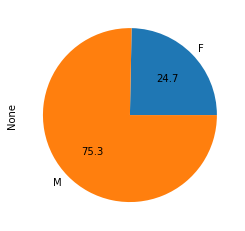

In [6]:
df.groupby('Gender').size().plot(kind ='pie',autopct='%.1f')

In [7]:
df.groupby('Gender').size()

Gender
F    135809
M    414259
dtype: int64

In [8]:
df.groupby('Gender').sum()['Purchase']

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

<AxesSubplot:ylabel='Purchase'>

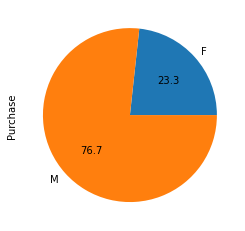

In [9]:
df.groupby('Gender').sum()['Purchase'].plot(kind ='pie',autopct='%.1f')

<AxesSubplot:ylabel='Purchase'>

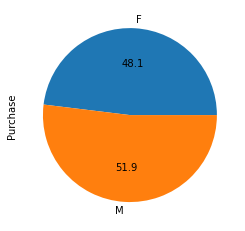

In [10]:
df.groupby('Gender').mean()['Purchase'].plot(kind ='pie',autopct='%.1f')

The Average amount spent per purchase by male is slightly higher then female by 3.8% . This concludes male and female have equal purchasing power(or men are having slighly more power. So the target customer could be men since they are large in number. no of males are 3 times the number of females.

In [11]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['Age']=df['Age'].map({'0-17':'Child','18-25':'Teenage','26-35':'Adult','36-45':'Adult','46-50':'Adult','51-55':'Old','55+':'Old'})

In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,Child,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,Child,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,Child,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,Child,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,Old,16,C,4+,0,8,NaN,NaN,7969


<AxesSubplot:xlabel='Age'>

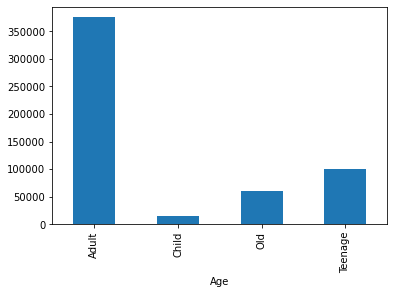

In [14]:
df.groupby('Age').size().plot(kind='bar')

<AxesSubplot:xlabel='Age'>

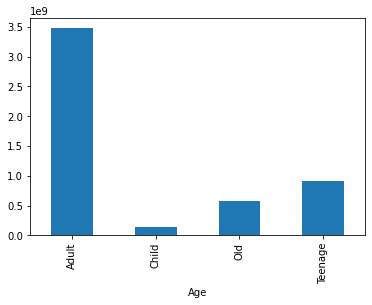

In [15]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar')

<AxesSubplot:xlabel='Age'>

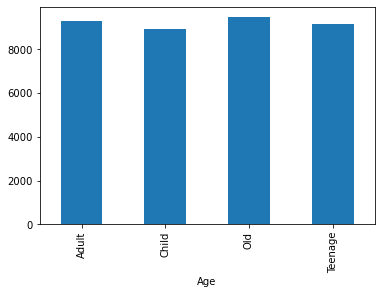

In [16]:
df.groupby('Age').mean()['Purchase'].plot(kind='bar')

In [17]:
df.groupby('Age').mean()['Purchase']

Age
Adult      9270.382613
Child      8933.464640
Old        9463.661678
Teenage    9169.663606
Name: Purchase, dtype: float64

The purchasing power of adult , old and teenage are somewhat same . since adults are greater in number we could target them for more products.

# filling the nan values in product_category_2 column

In [18]:
a = df.groupby(['Age'])['Product_Category_2'].agg(pd.Series.mode)
a

Age
Adult      8.0
Child      4.0
Old        8.0
Teenage    8.0
Name: Product_Category_2, dtype: float64

In [19]:
child = df.loc[df['Age'] == 'Child' ,'Product_Category_2'].fillna(a['Child'])
df.loc[df['Age']=='Child','Product_Category_2'] = child

adult=df.loc[df['Age'] == 'Adult' ,'Product_Category_2'].fillna(a['Adult'])
df.loc[df['Age']=='Adult','Product_Category_2'] = adult

teenage=df.loc[df['Age'] == 'Teenage' ,'Product_Category_2'].fillna(a['Teenage'])
df.loc[df['Age']=='Teenage','Product_Category_2'] = teenage

old=df.loc[df['Age'] == 'Old' ,'Product_Category_2'].fillna(a['Old'])
df.loc[df['Age']=='Old','Product_Category_2'] = old

In [20]:
df['Product_Category_2'].isnull().sum()

0

In [21]:
df.groupby(['Marital_Status']).size()

Marital_Status
0    324731
1    225337
dtype: int64

In [22]:
df.groupby('Marital_Status').mean()['Purchase']

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [23]:
df.groupby('Marital_Status').sum()['Purchase']

Marital_Status
0    3008927447
1    2086885295
Name: Purchase, dtype: int64

In [24]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,MaritalGender
0,1000001,P00069042,F,Child,10,A,2,0,3,4.0,NaN,8370,F_0
1,1000001,P00248942,F,Child,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,Child,10,A,2,0,12,4.0,NaN,1422,F_0
3,1000001,P00085442,F,Child,10,A,2,0,12,14.0,NaN,1057,F_0
4,1000002,P00285442,M,Old,16,C,4+,0,8,8.0,NaN,7969,M_0


In [26]:
df.groupby('MaritalGender').sum()['Purchase']

MaritalGender
F_0     684154127
F_1     502078515
M_0    2324773320
M_1    1584806780
Name: Purchase, dtype: int64

In [27]:
df.groupby('MaritalGender').mean()['Purchase']

MaritalGender
F_0    8679.845815
F_1    8810.249789
M_0    9453.756740
M_1    9413.817605
Name: Purchase, dtype: float64

purchasing power of married and unmarried people are also same in same gender. At the same time purchasing power of male are greater.


<AxesSubplot:ylabel='Purchase'>

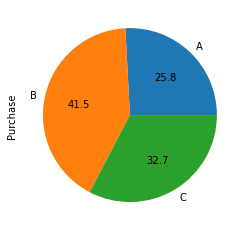

In [28]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<AxesSubplot:ylabel='Purchase'>

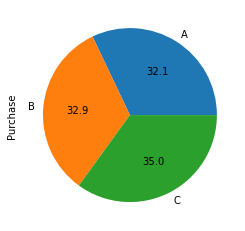

In [29]:
df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

people in city A tend to buy more expensive products as compared to city B , hence we need to focus on city A for selling any expensive item.

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

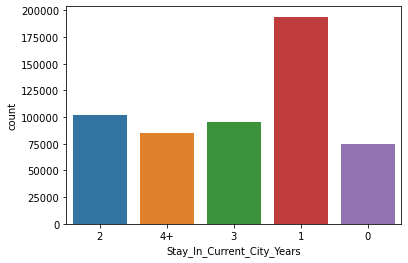

In [30]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<AxesSubplot:ylabel='None'>

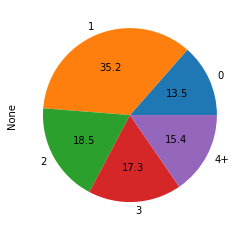

In [31]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = "%.1f")

<AxesSubplot:xlabel='Occupation'>

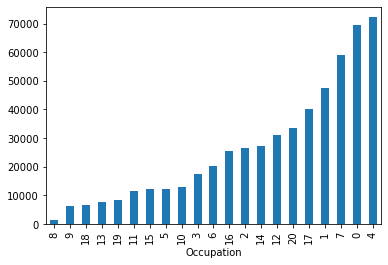

In [32]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

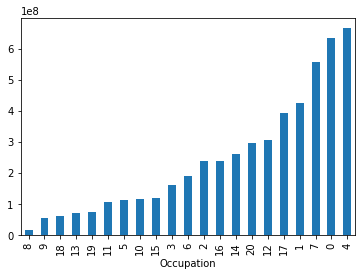

In [33]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

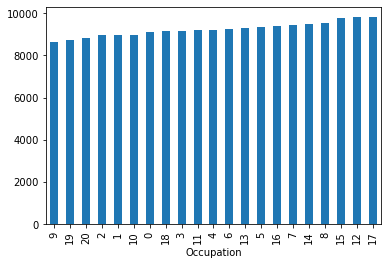

In [34]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')

In [64]:
X = df.drop(columns =['Product_Category_3','Purchase','User_ID','Product_ID','MaritalGender'])


<AxesSubplot:>

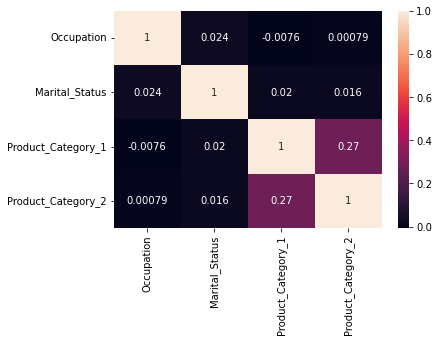

In [65]:
sns.heatmap(X.corr(),annot = True)

In [66]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,F,Child,10,A,2,0,3,4.0
1,F,Child,10,A,2,0,1,6.0
2,F,Child,10,A,2,0,12,4.0
3,F,Child,10,A,2,0,12,14.0
4,M,Old,16,C,4+,0,8,8.0


In [74]:
X1 = X.select_dtypes('O')

for col in X1.columns:
    lb = LabelEncoder()
    X[col] = lb.fit_transform(X1[col].values)
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,0,1,10,0,2,0,3,4.0
1,0,1,10,0,2,0,1,6.0
2,0,1,10,0,2,0,12,4.0
3,0,1,10,0,2,0,12,14.0
4,1,2,16,2,4,0,8,8.0


In [68]:
Y = df['Purchase']

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [70]:
X_train.shape

(412551, 8)

In [71]:
X_test.shape

(137517, 8)

In [72]:
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [73]:
dt.score(X_train,Y_train), dt.score(X_test,Y_test)

(0.7261646829538863, 0.6121699753206444)